In [1]:
from movielens_analysis import Links, Movies, Tags, Ratings, visualize_dict, visualize_pie, file_reader

# Первые методы вспомогательные и не возвращают полезной информации

print("\033[1m" + "Links" + "\033[0m")
%timeit links = Links('ml-latest-small/links.csv')
links = Links('ml-latest-small/links.csv')

print("\n- get_imdb")
%timeit -n1 -r1 links.get_imdb(['1'], ['Director']) # Флаги -n1 -r1 чтобы запустить и затаймить код 1 раз, чтобы не спамить GET реквесты
tsd = links.get_imdb(['1'], ['Director'])[0][1][0]  # Смотрю на IMDB режиссера фильма с первым id (История Игрушек)
print(f'Режиссер Истории Игрушек это {tsd}')


print("\n- calculate_budget")
%timeit links.calculate_budget('CA$1234')
converted_currency = links.calculate_budget('CA$1234')
print(f'1234 канадских долларов это {converted_currency} долларов')

print("\n- file_reader method for links")
%timeit links.links_file_reader('ml-latest-small/links.csv')
toy_story_ids = next(links.links_file_reader('ml-latest-small/links.csv')) # Обращаюсь к генератору за следующей строкой с id

print("\033[1m" + "\nMovies" + "\033[0m")
%timeit movies = Movies('ml-latest-small/movies.csv')
movies = Movies('ml-latest-small/movies.csv')

print("\n- file_reader method for movies")
%timeit movies.movies_file_reader('ml-latest-small/movies.csv')

print("\033[1m" + "\nTags" + "\033[0m")
%timeit tags = Tags('ml-latest-small/tags.csv')
tags = Tags('ml-latest-small/tags.csv')

print("\n- file_reader method for tags")
%timeit file_reader('ml-latest-small/tags.csv')

print("\033[1m" + "\nRatings" + "\033[0m")
%timeit ratings = Ratings('ml-latest-small/ratings.csv')
ratings = Ratings('ml-latest-small/ratings.csv')

print("\n- file_reader method for ratings")
%timeit file_reader('ml-latest-small/ratings.csv')


Links
6.84 ms ± 164 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

- get_imdb
2.41 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
Режиссер Истории Игрушек это John Lasseter

- calculate_budget
1.74 µs ± 10 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
1234 канадских долларов это 913.16 долларов

- file_reader method for links
210 ns ± 0.586 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)

Movies
90.8 ms ± 6.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

- file_reader method for movies
220 ns ± 2.7 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)

Tags
3.21 ms ± 39.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

- file_reader method for tags
187 ns ± 3.98 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)

Ratings
94.9 ms ± 765 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)

- file_reader method for ratings
187 ns ± 4.47 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 l

54.3 ms ± 4.38 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


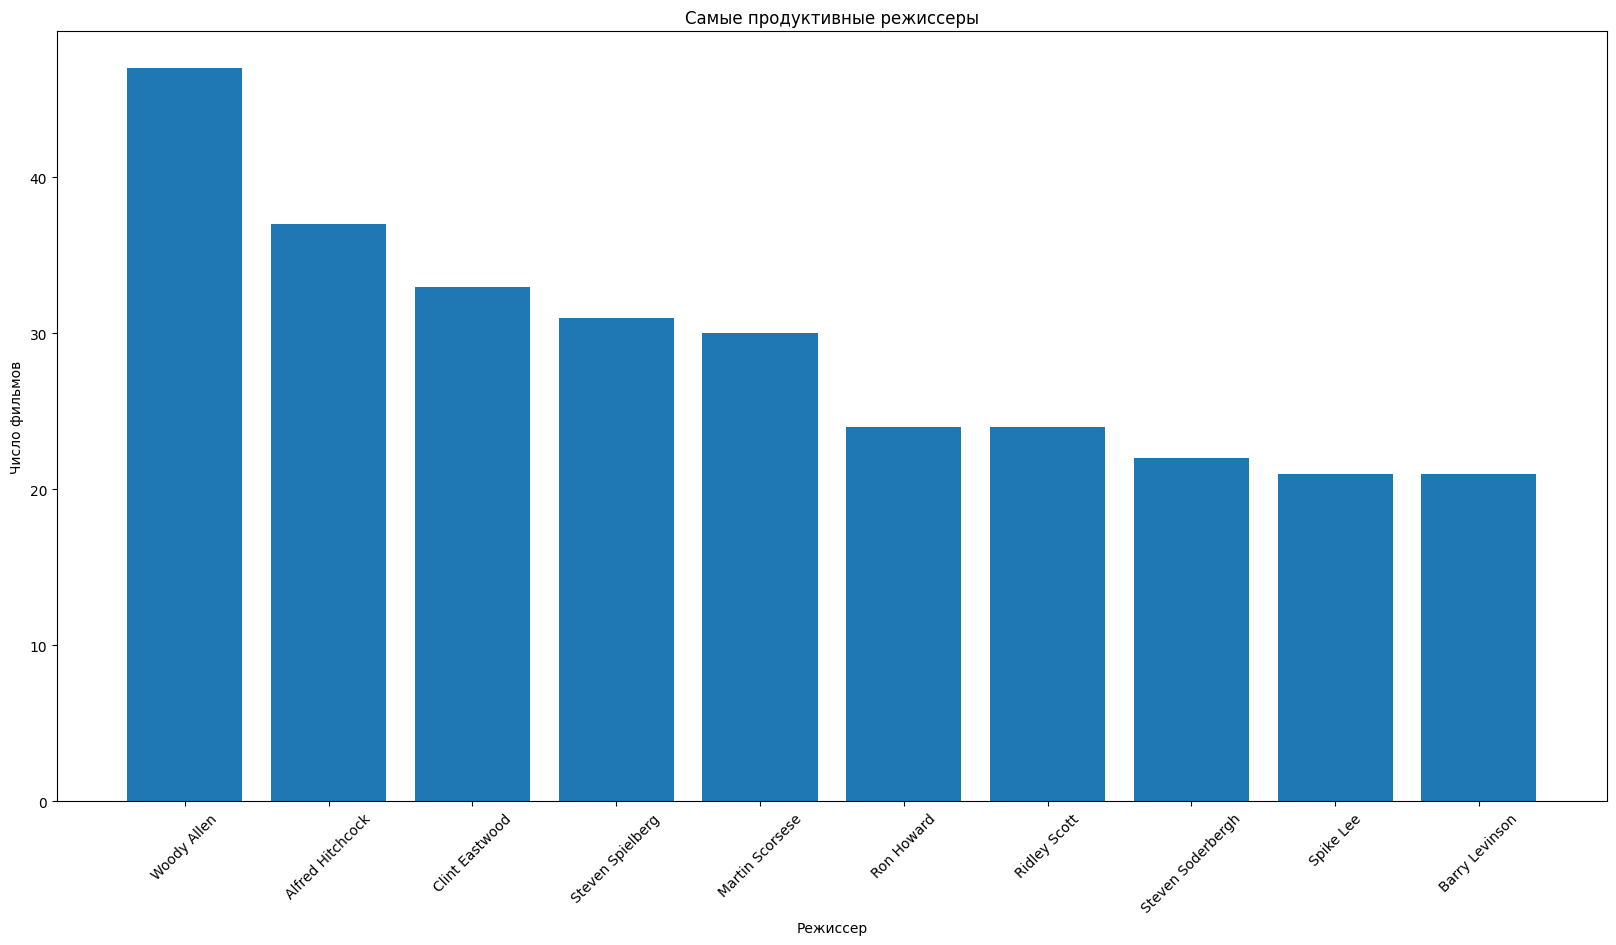

273 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [2]:
%timeit links.top_directors(10)
data = links.top_directors(10)
%timeit -n1 -r1 visualize_dict(data, "Режиссер", "Число фильмов", "Самые продуктивные режиссеры")

Можем видеть, что самые продуктивные режиссеры в истории кинематографа сняли около 30 фильмов с некоторым разбросом, исключение составил Вуди Аллен с выдающимся рекордом в 47 фильмов.

52 ms ± 1.61 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


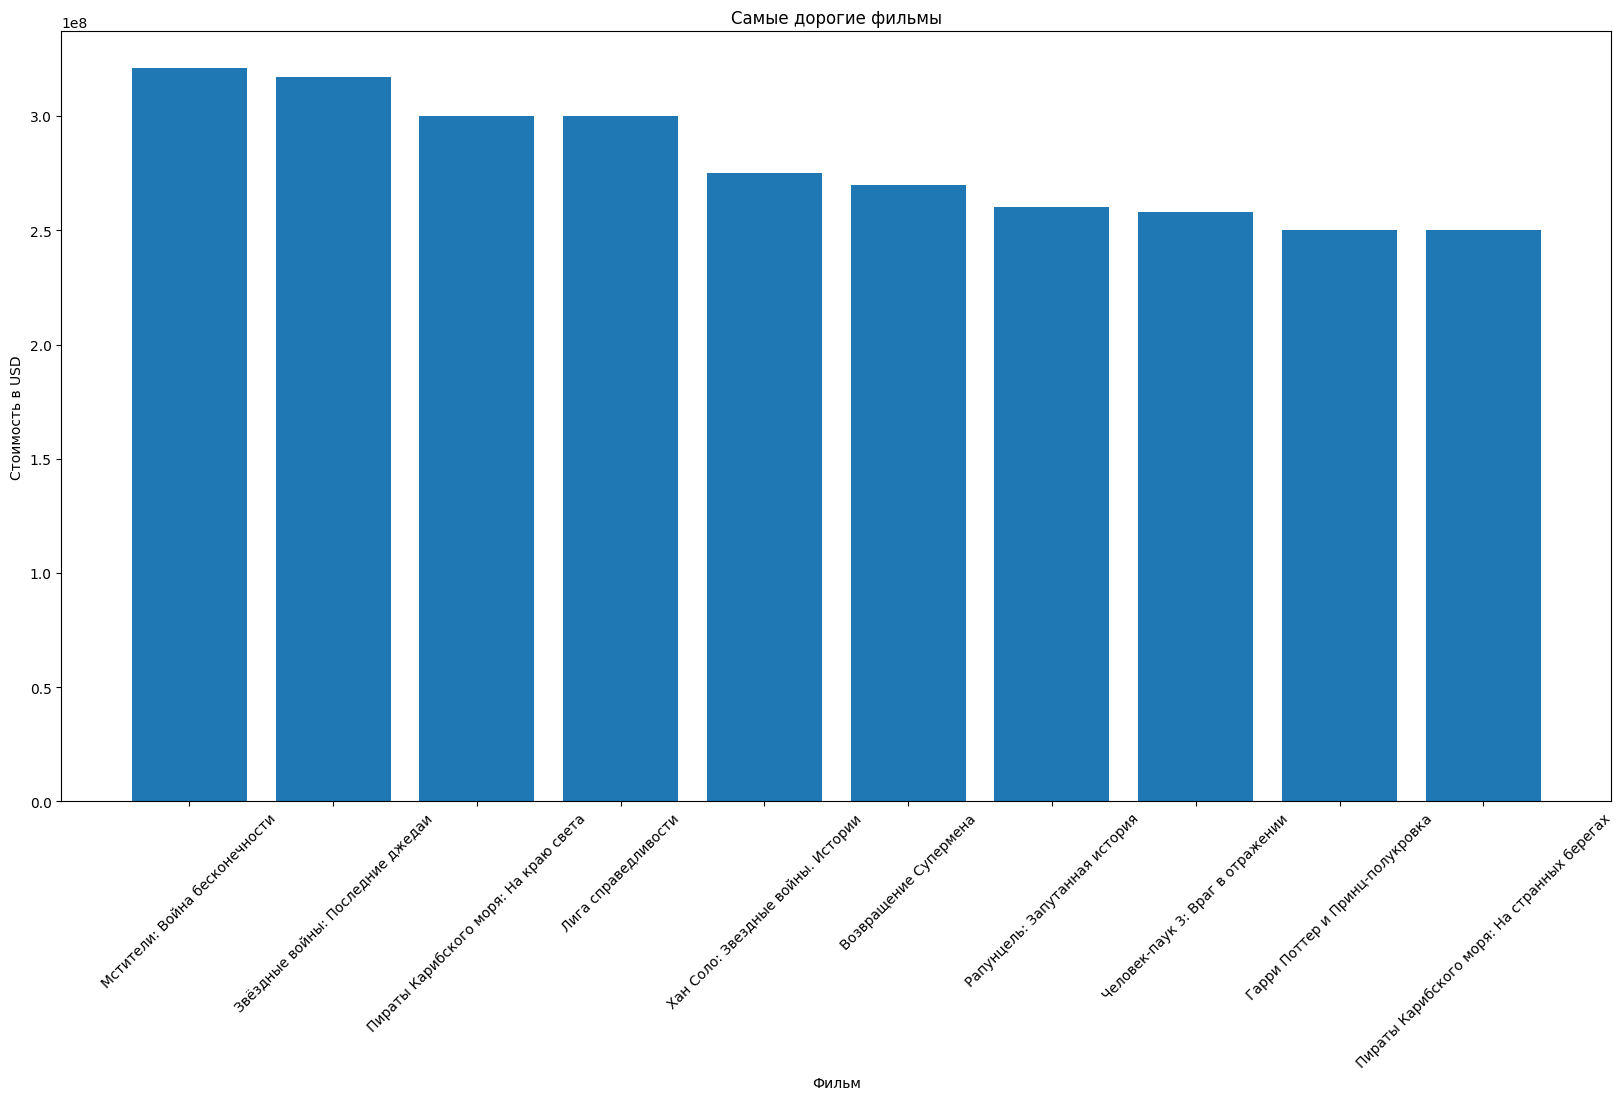

50.4 ms ± 607 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


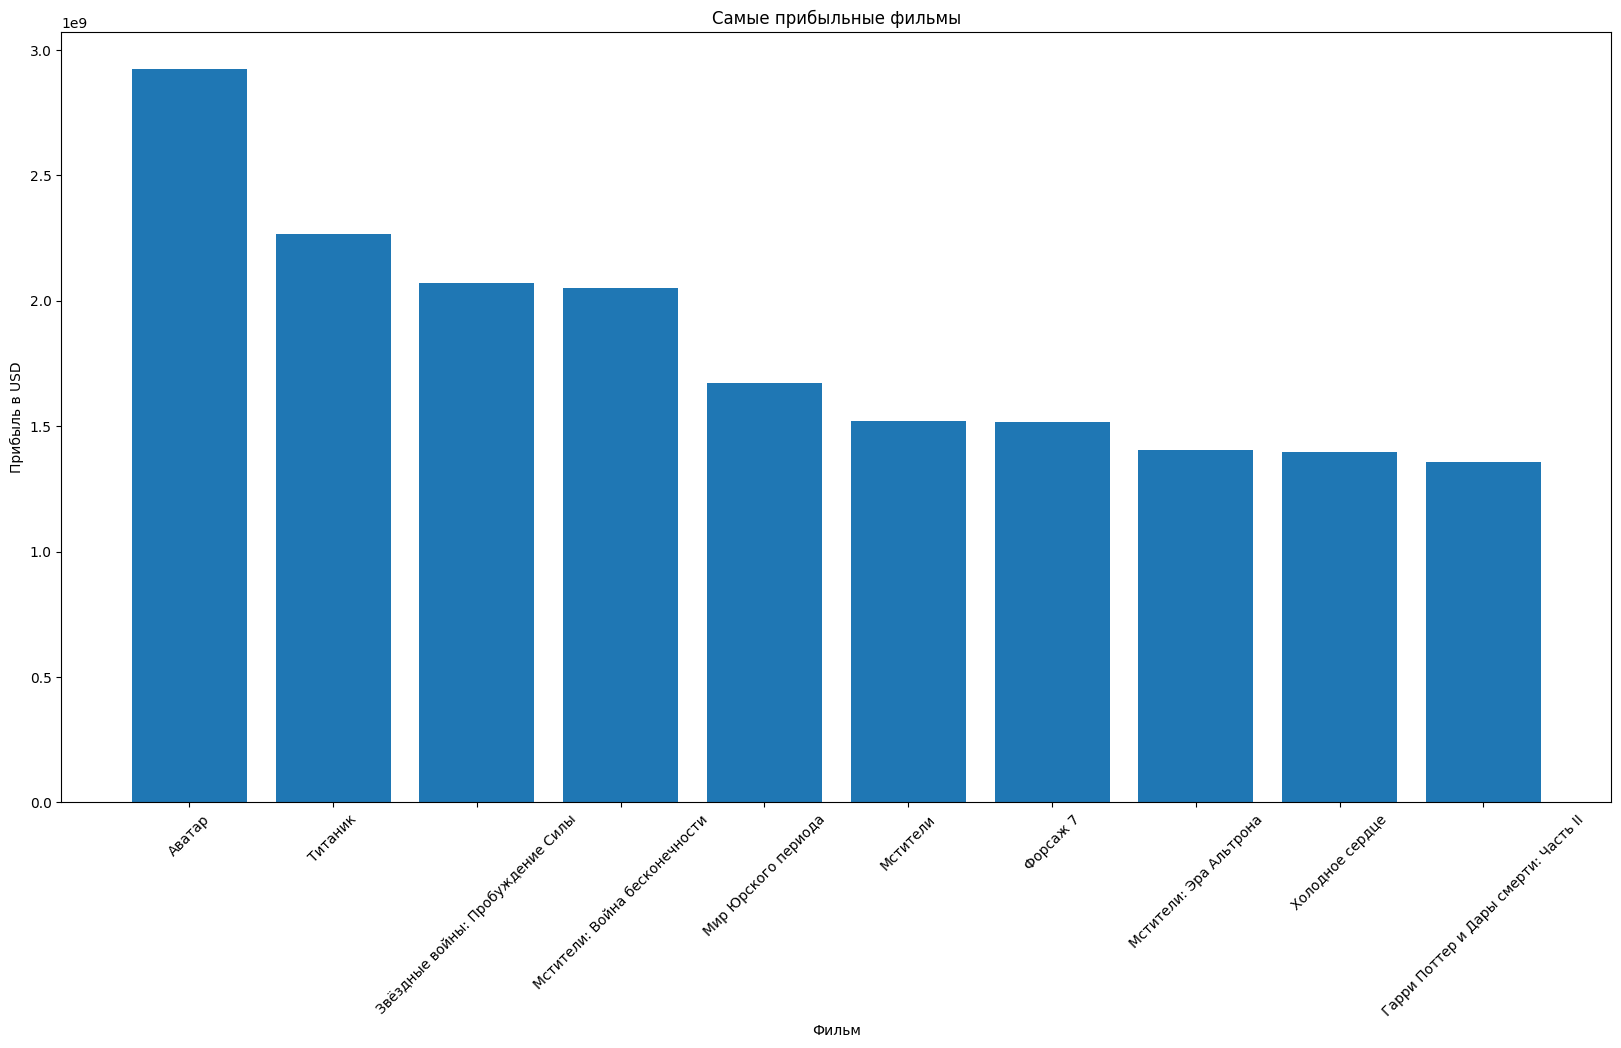

57.2 ms ± 218 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


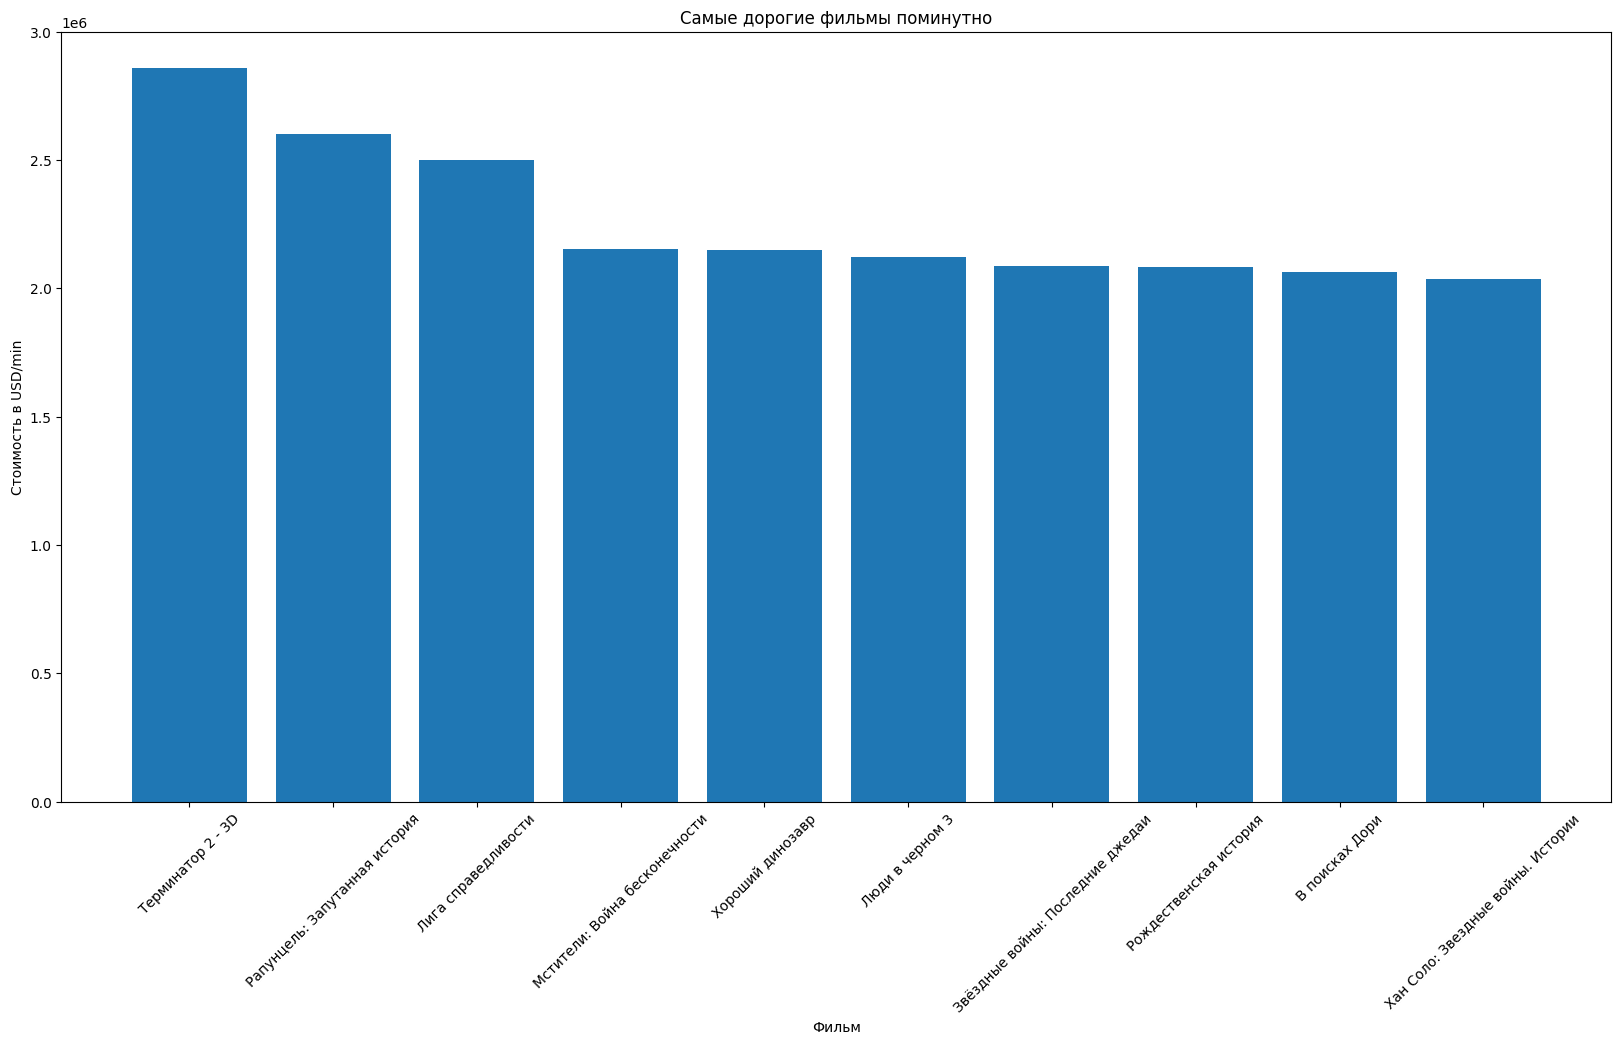

In [3]:
%timeit links.most_expensive(10)
data = links.most_expensive(10)
visualize_dict(data, "Фильм", "Стоимость в USD", "Самые дорогие фильмы")

%timeit links.most_profitable(10)
data = links.most_profitable(10)
visualize_dict(data, "Фильм", "Прибыль в USD", "Самые прибыльные фильмы")

%timeit links.top_cost_per_minute(10)
data = links.top_cost_per_minute(10)
visualize_dict(data, "Фильм", "Стоимость в USD/min", "Самые дорогие фильмы поминутно")

Графики выше показывают, что 2 самые кассовые ленты в истории кинематографа это оригинальные картины (Аватар и Титаник), при этом самые дорогие фильмы -- это почти всегда сиквел большой франшизы. Так, 8 из 10 самых дорогих фильмов это сиквелы франшиз DC Comics, Star Wars, Pirates of the Carribean, MCU.

При этом, если пересчитать стоимость каждой минуты хронометража для каждого фильма, то в десятку лидеров попадают сразу 4 мультипликационные киноленты (Рапунцель, Хороший динозавр, Рождественская история, В поисках Дори), что говорит о более заметной корелляции хронометража анимационных фильмов и их стоимости.

66.4 ms ± 3.82 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


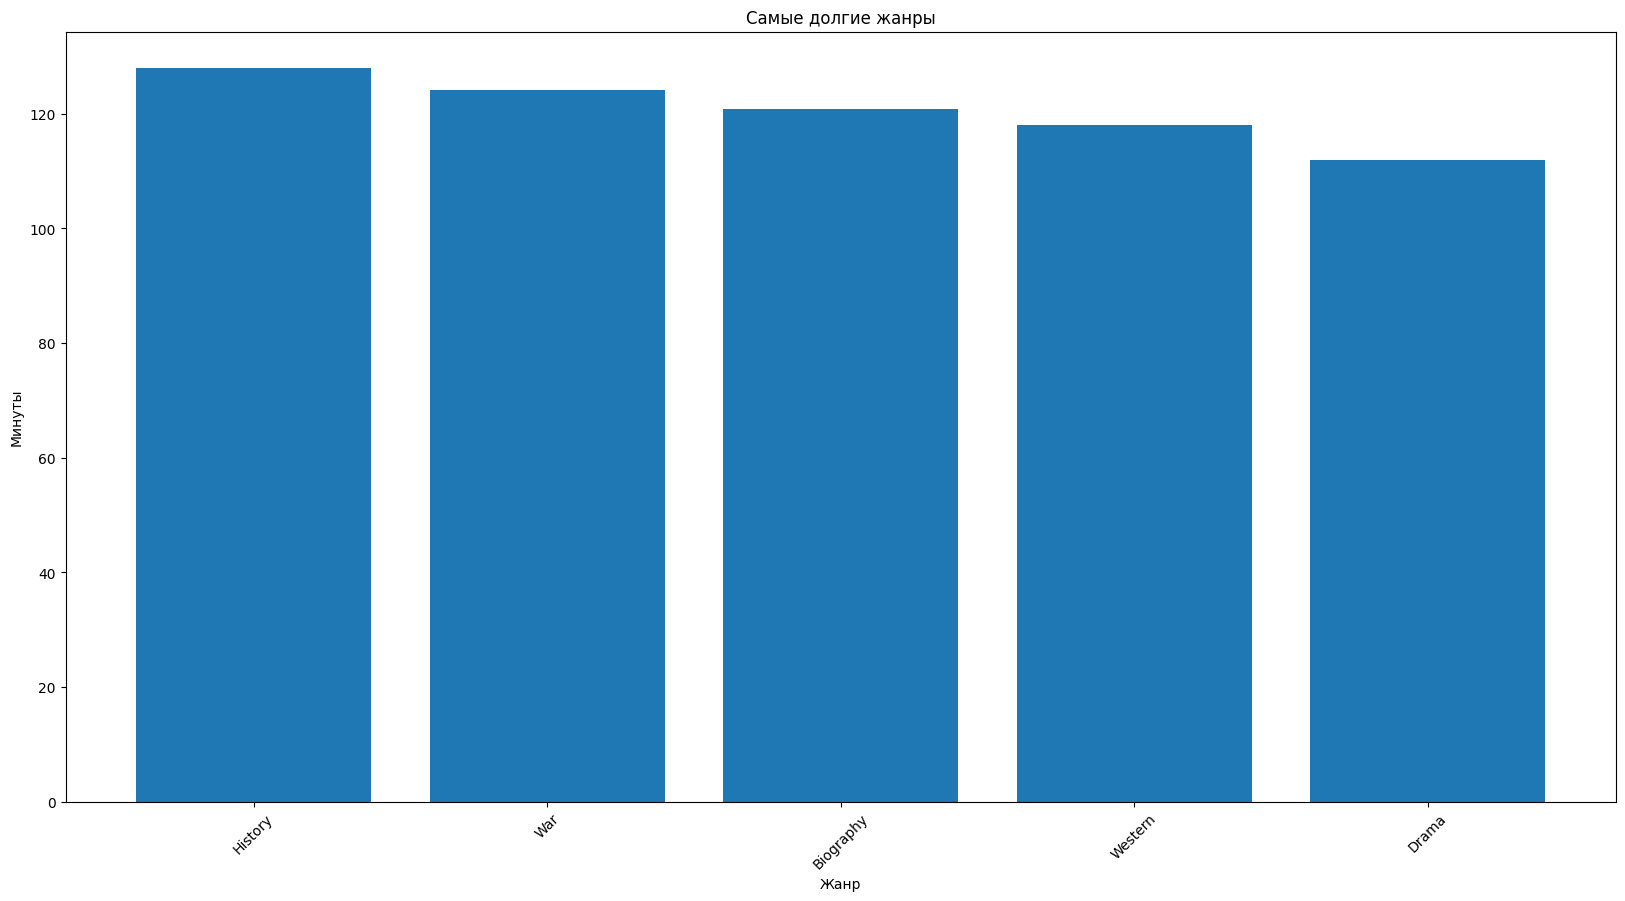

In [4]:
%timeit links.longest_by_genre(5)
data = links.longest_by_genre(5)
visualize_dict(data, "Жанр", "Минуты", "Самые долгие жанры")

Жанрами с самым долгим средним хронометражем оказались 'History', 'War' и 'Biography'. Все 3 жанра имеют отношение к документалистике, которая предполагает глубину исследования. Т.к. реальность зачастую является многослойной и сложной, всестороннее освещение темы требует большего хронометража, даже если фильм художественный.

528 µs ± 3.19 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


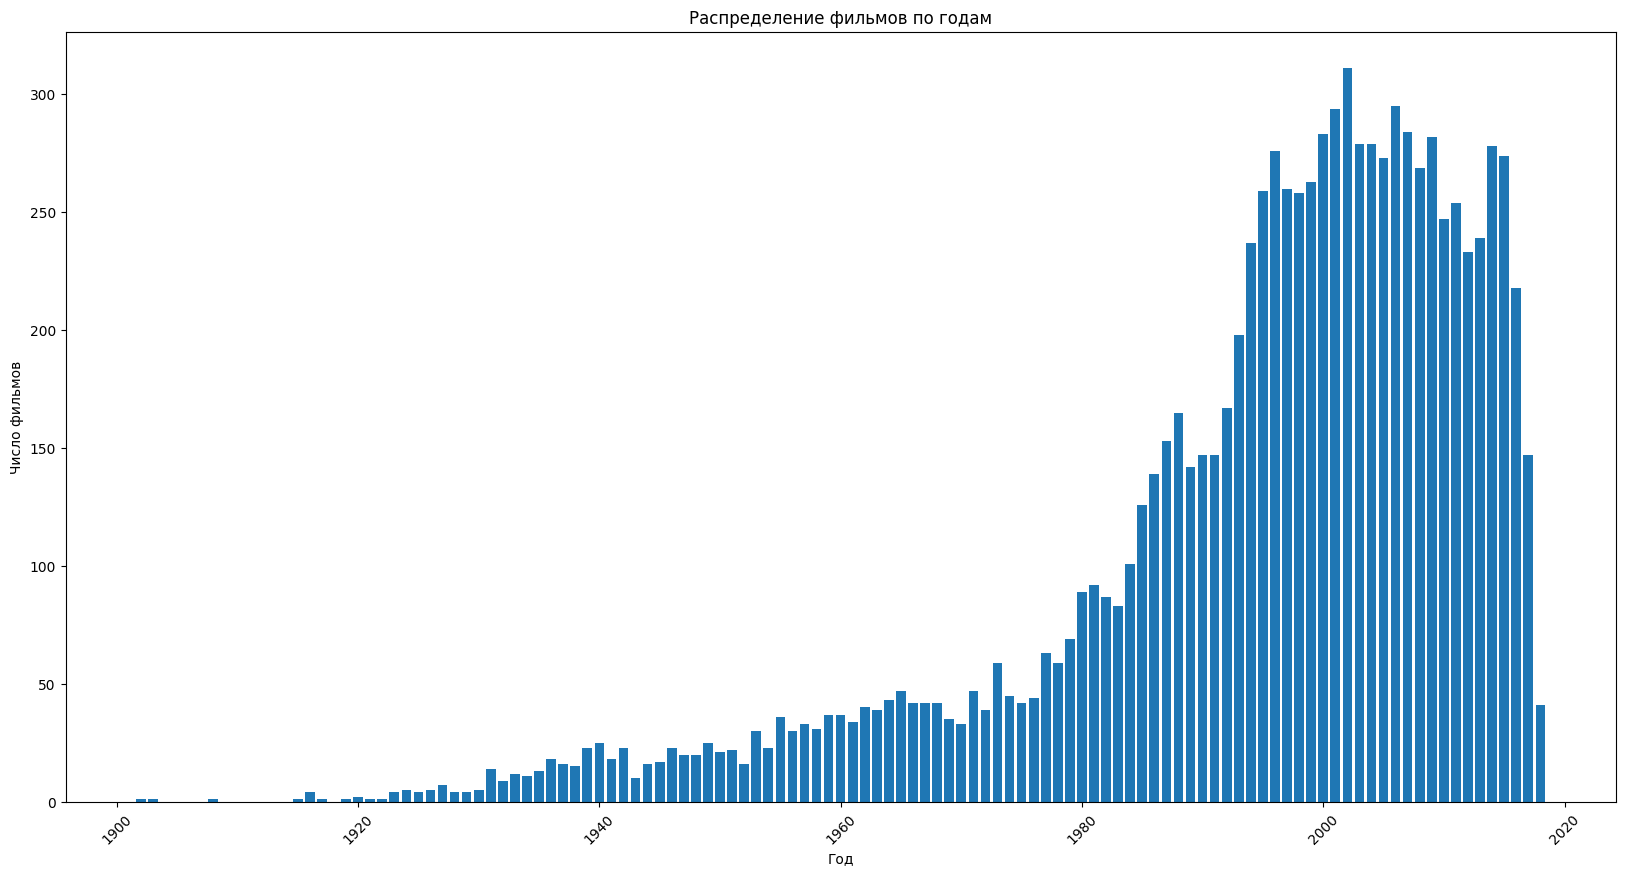

In [5]:
%timeit movies.dist_by_release()
data = movies.dist_by_release()
visualize_dict(data, "Год", "Число фильмов", "Распределение фильмов по годам")

На графике видно, что в 80-х и 90-х произошел резкий скачок в производстве кинематографа. Это связано в первую очередь с технологическими инновациями. В 1980-х годах появилось домашнее видео, включая видеомагнитофоны и видеокассеты, что позволило зрителям смотреть фильмы в удобное для них время и в удобном месте.
С 1990-х годов развитие Интернета привело к появлению онлайн-кинотеатров и стриминговых сервисов, что сделало фильмы еще более доступными для зрителей.

Эти технологические инновации не только упростили доступ к кинематографу, но и расширили возможности для создания и распространения фильмов.

6.13 ms ± 23 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


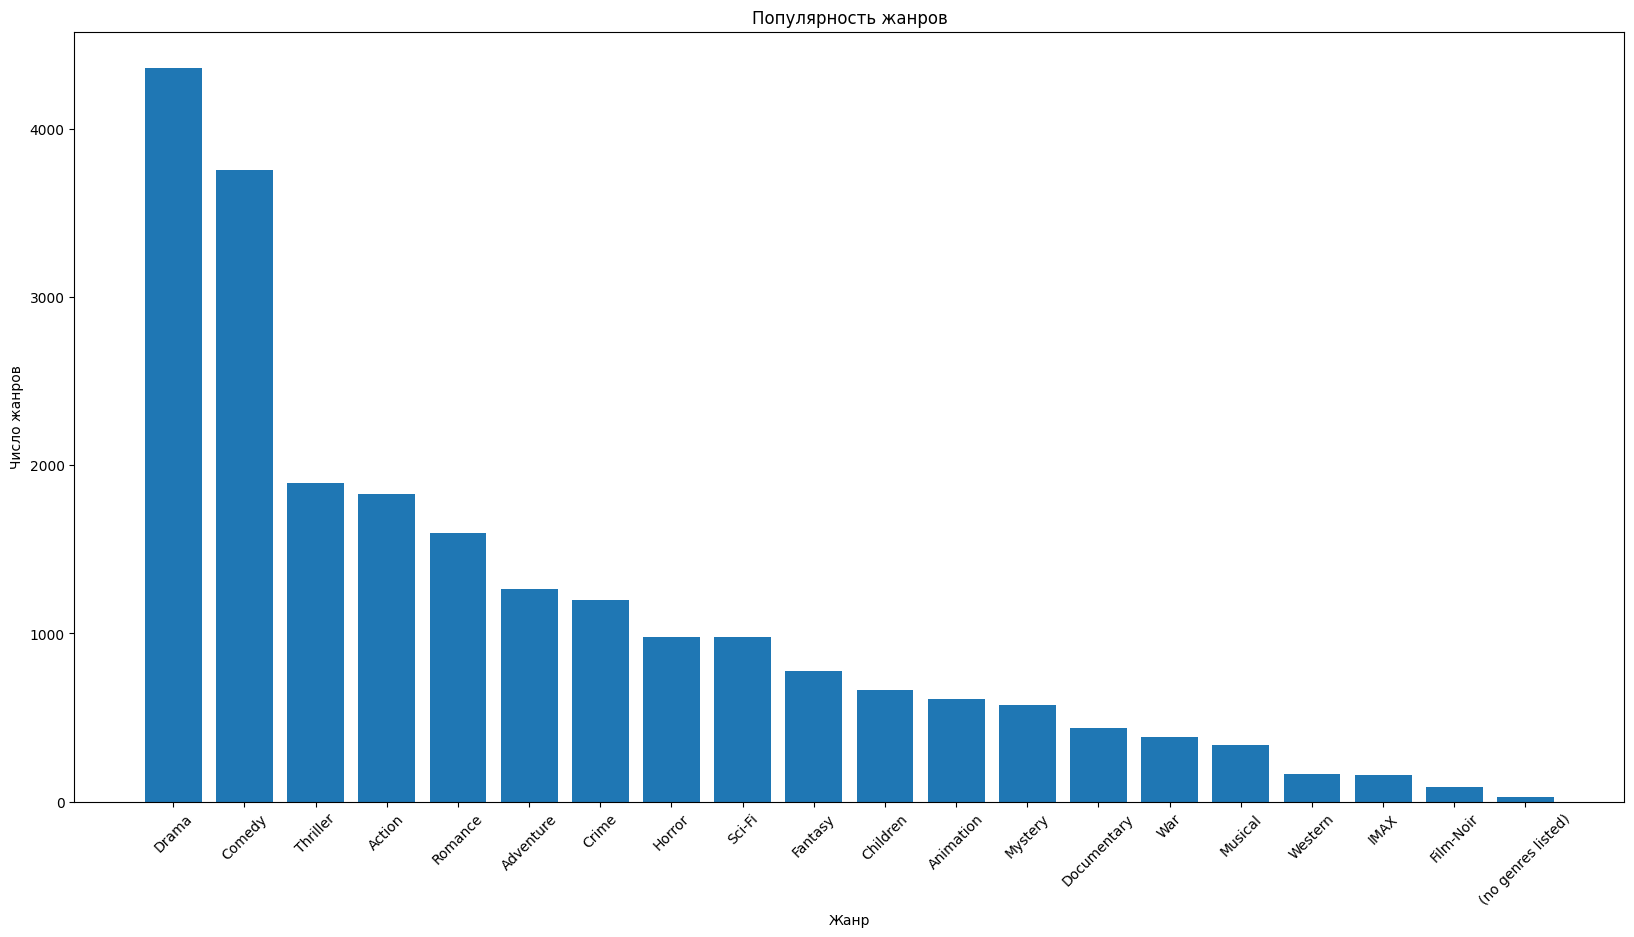

In [6]:
%timeit movies.dist_by_genres()
data = movies.dist_by_genres()
visualize_dict(data, "Жанр", "Число жанров", "Популярность жанров")

Драма и комедия -- 2 самых популярных жанра с большим отрывом. Полагаю, что дело в универсальности этих жанров, неслучайно они выделялись как 2 первородных жанра в театре, обозначенные еще Аристотелем, со своими свойствами и структурой. 

В силу своей универсальности, они могут быть представлены в разных поджанрах или в комбинации с другими жанрами, например, фильм категории "романтика" почти всегда будет в паре с драмой, приключения часто предполагают комедию и т.д.

In [7]:
%timeit movies.trends_over_time()
data = movies.trends_over_time()
for k, v in data.items():
    print(f'Десятилетие: {k}')
    print(f'Топ-3 жанров: {v[0]}, {v[1]}, {v[2]}\n')

69.5 ms ± 207 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Десятилетие: 1900-1909
Топ-3 жанров: Sci-Fi, Action, Adventure

Десятилетие: 1910-1919
Топ-3 жанров: Drama, Comedy, War

Десятилетие: 1920-1929
Топ-3 жанров: Drama, Comedy, Romance

Десятилетие: 1930-1939
Топ-3 жанров: Drama, Comedy, Romance

Десятилетие: 1940-1949
Топ-3 жанров: Drama, Comedy, Romance

Десятилетие: 1950-1959
Топ-3 жанров: Drama, Comedy, Romance

Десятилетие: 1960-1969
Топ-3 жанров: Drama, Comedy, Adventure

Десятилетие: 1970-1979
Топ-3 жанров: Drama, Comedy, Action

Десятилетие: 1980-1989
Топ-3 жанров: Comedy, Drama, Action

Десятилетие: 1990-1999
Топ-3 жанров: Drama, Comedy, Romance

Десятилетие: 2000-2009
Топ-3 жанров: Drama, Comedy, Thriller

Десятилетие: 2010-2019
Топ-3 жанров: Comedy, Drama, Action



По результатам анализа видно, что драма и комедия всегда оставались самыми доминирующими жанрами на протяжении всей истории кинематографа.

Интересно заметить, что всю первую половину 20 века тройку популярнейших жанров замыкала романтика.

70-80е были временем боевиков, когда Голливуд начал превращать кино в сферу развлечений. Многие актеры стали символами этого времени, а технологии и рост бюджетов позволили отойти от жанра романтики, который опирался на эмоциональную привлекательность.

Популярность action-фильмов в 2010х годах объясняется появлением реалистичных спецэффектов, а также успехом таких франшиз, как "Мстители" и "Форсаж". 

446 µs ± 31.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


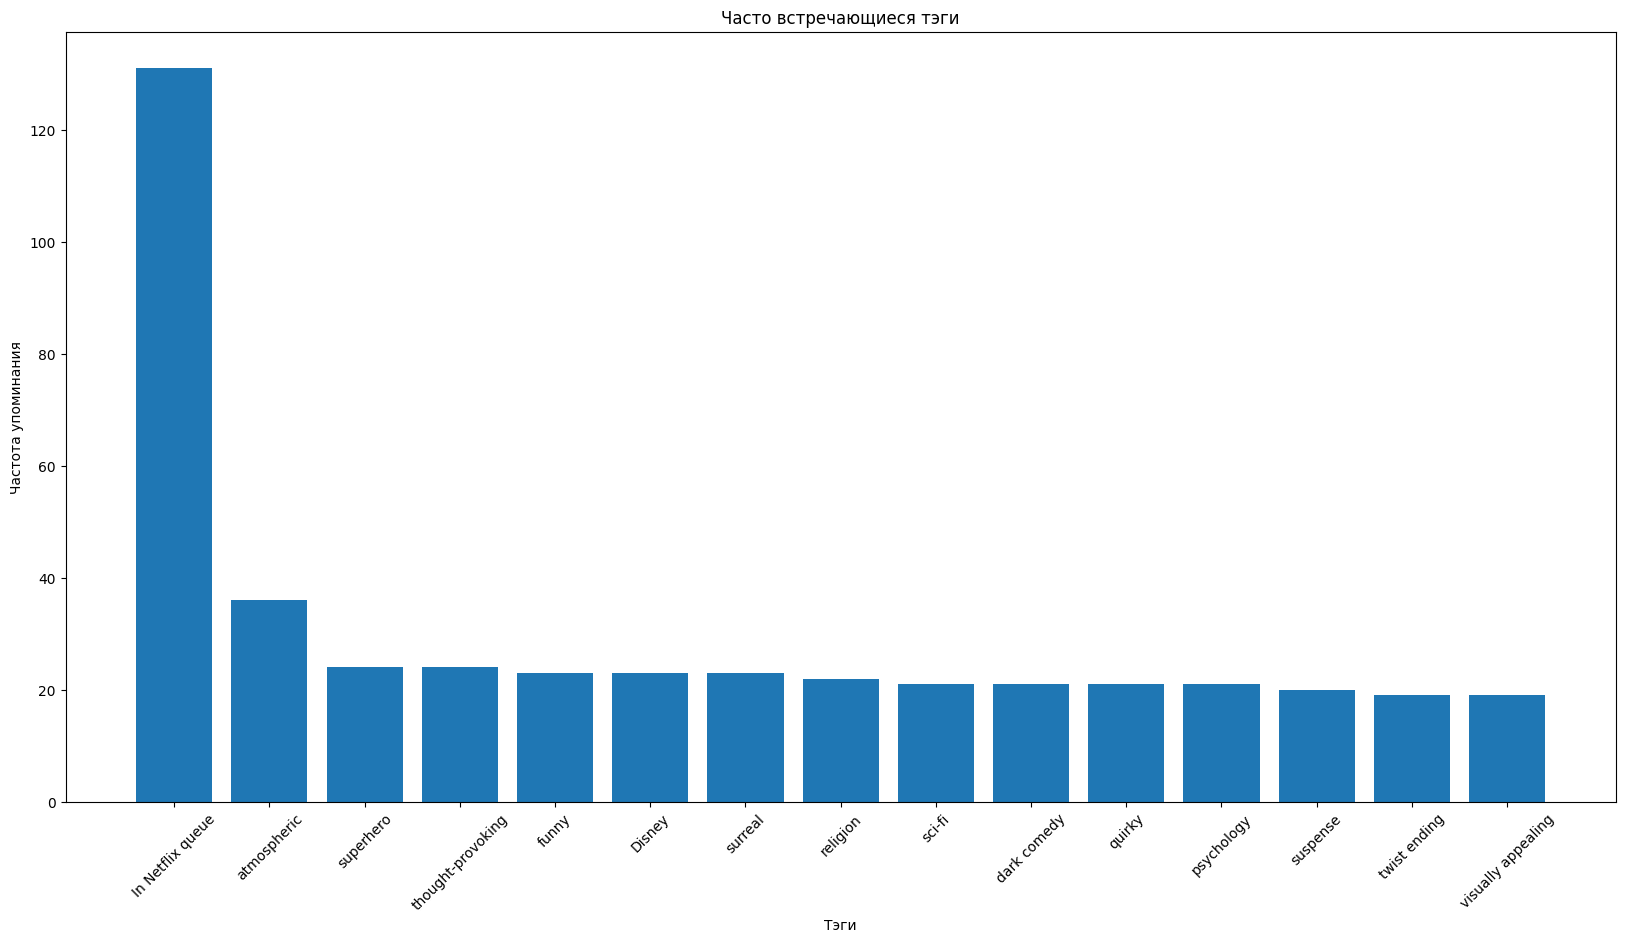

In [8]:
%timeit tags.most_common_tags()
data = tags.most_common_tags()
visualize_dict(data, "Тэги", "Частота упоминания", "Часто встречающиеся тэги")

Наиболее популярным тэгом оказался "In Netflix queue". 
(Queue – это печатный журнал стримингового сервиса Netflix, посвящённый выпускаемому контенту.)

Кроме того, зрители склонны описывать фильмы как "атмосферные".
    
Остальные популярные теги распределены практически равномерно. 

190 µs ± 1.11 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


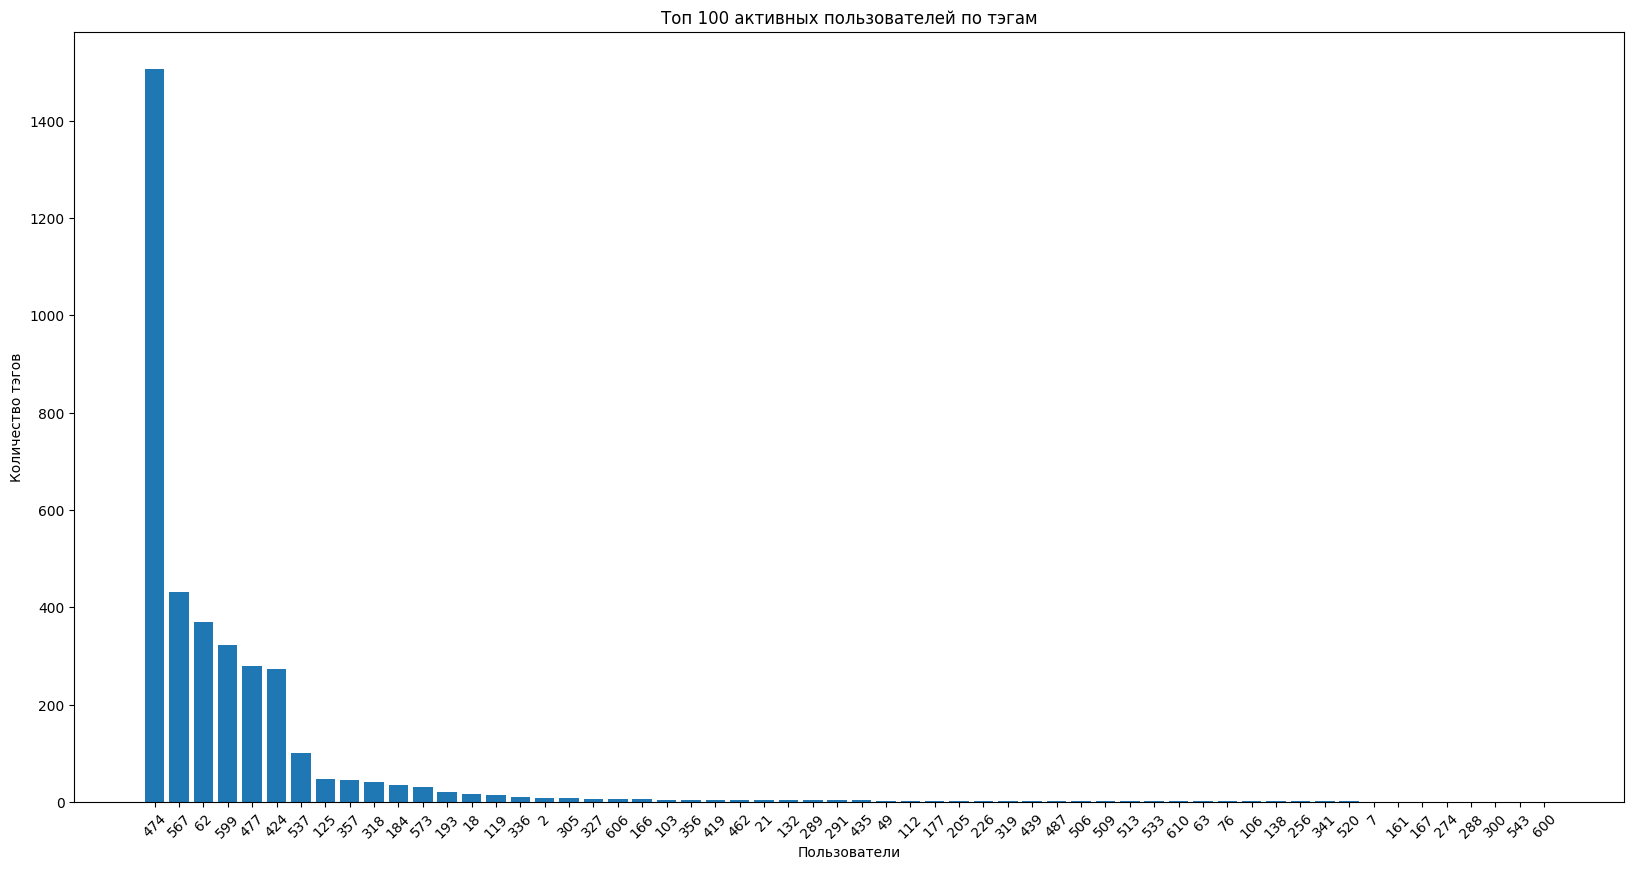

In [9]:
%timeit tags.most_active_user()
data = tags.most_active_user()
visualize_dict(data, "Пользователи", "Количество тэгов", "Топ 100 активных пользователей по тэгам")

Пользователь c id 474 оказался в разы активнее всех остальных. Распределение активности среди пользователей крайне неравномерное.
Большинство пользователей редко ставят тэги. 

Графики выше позволяют выдвинуть гипотезу о наличии некой зависимости между популярностью тэга "In Netflix queue" и активностью пользователя с id 474. Действительно ли данный тэг является наиболее популярным среди пользователей либо это любимый тэг всего одного наиболее активного пользователя? 

Ниже представлен метод, позволяющий определить, сколько различных пользователей поставили конкретный тэг, а также сколько раз данный тэг поставил каждый пользователь.  

432 µs ± 47.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


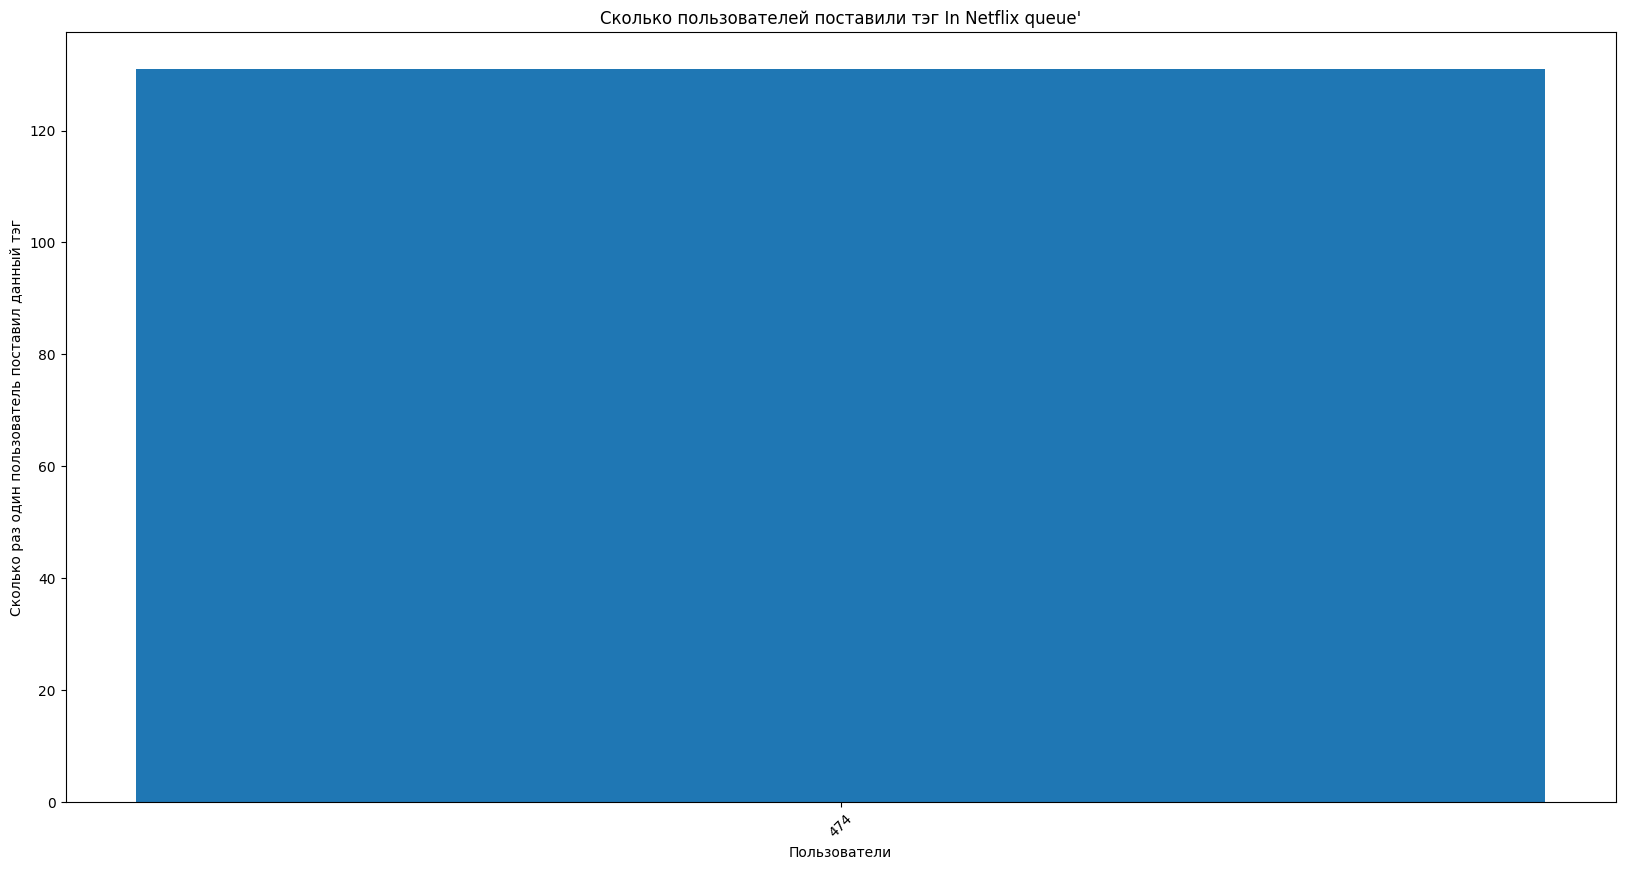

399 µs ± 4.18 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


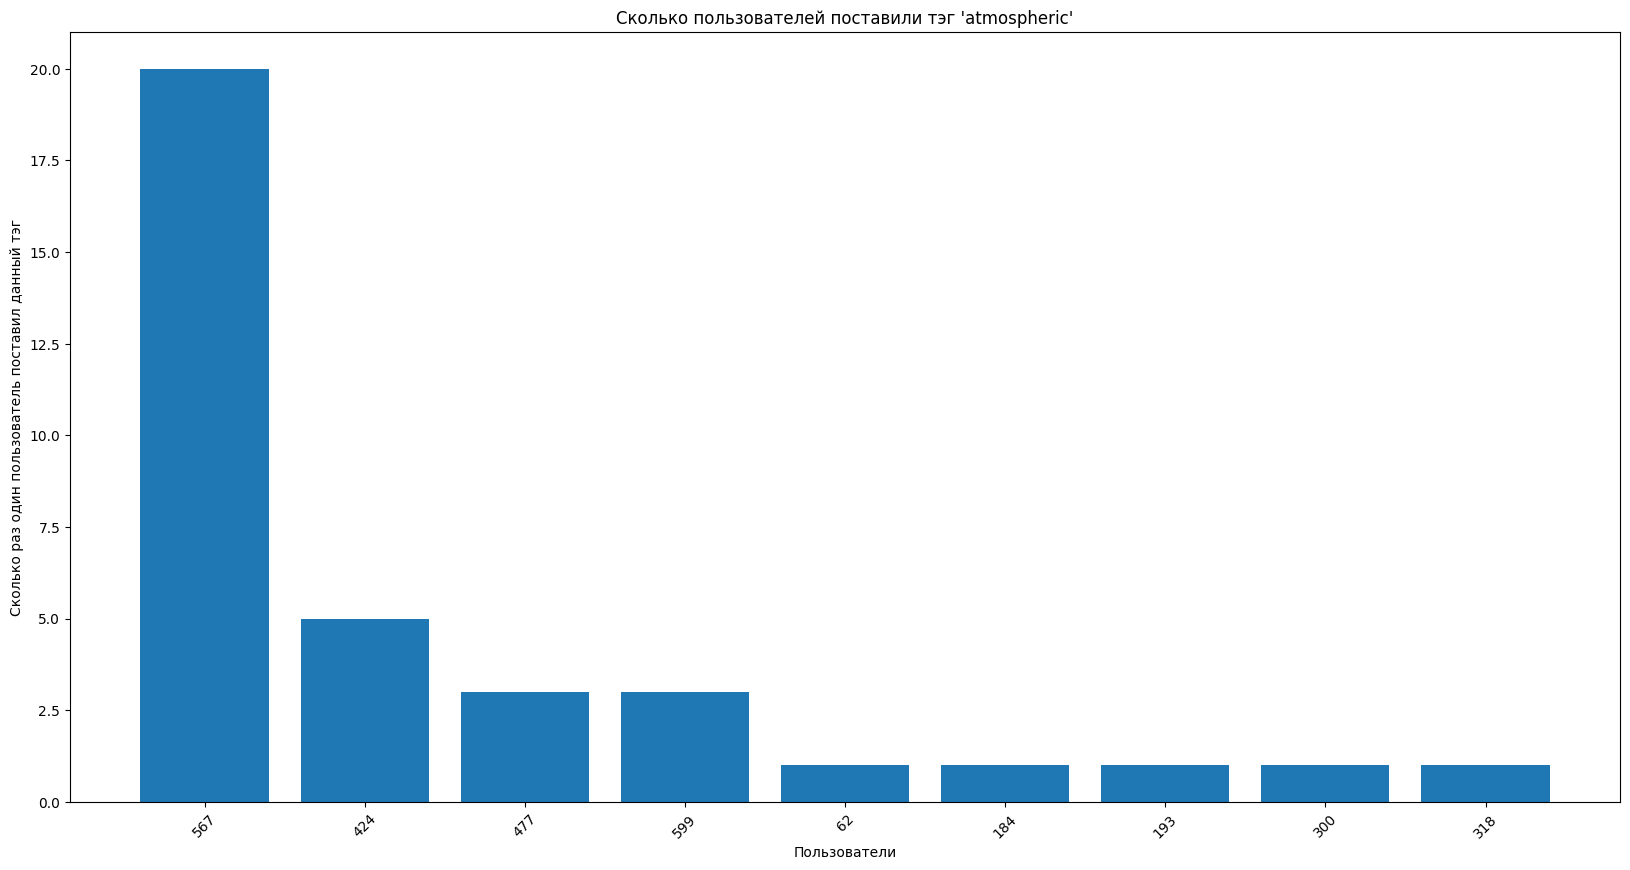

391 µs ± 2.35 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


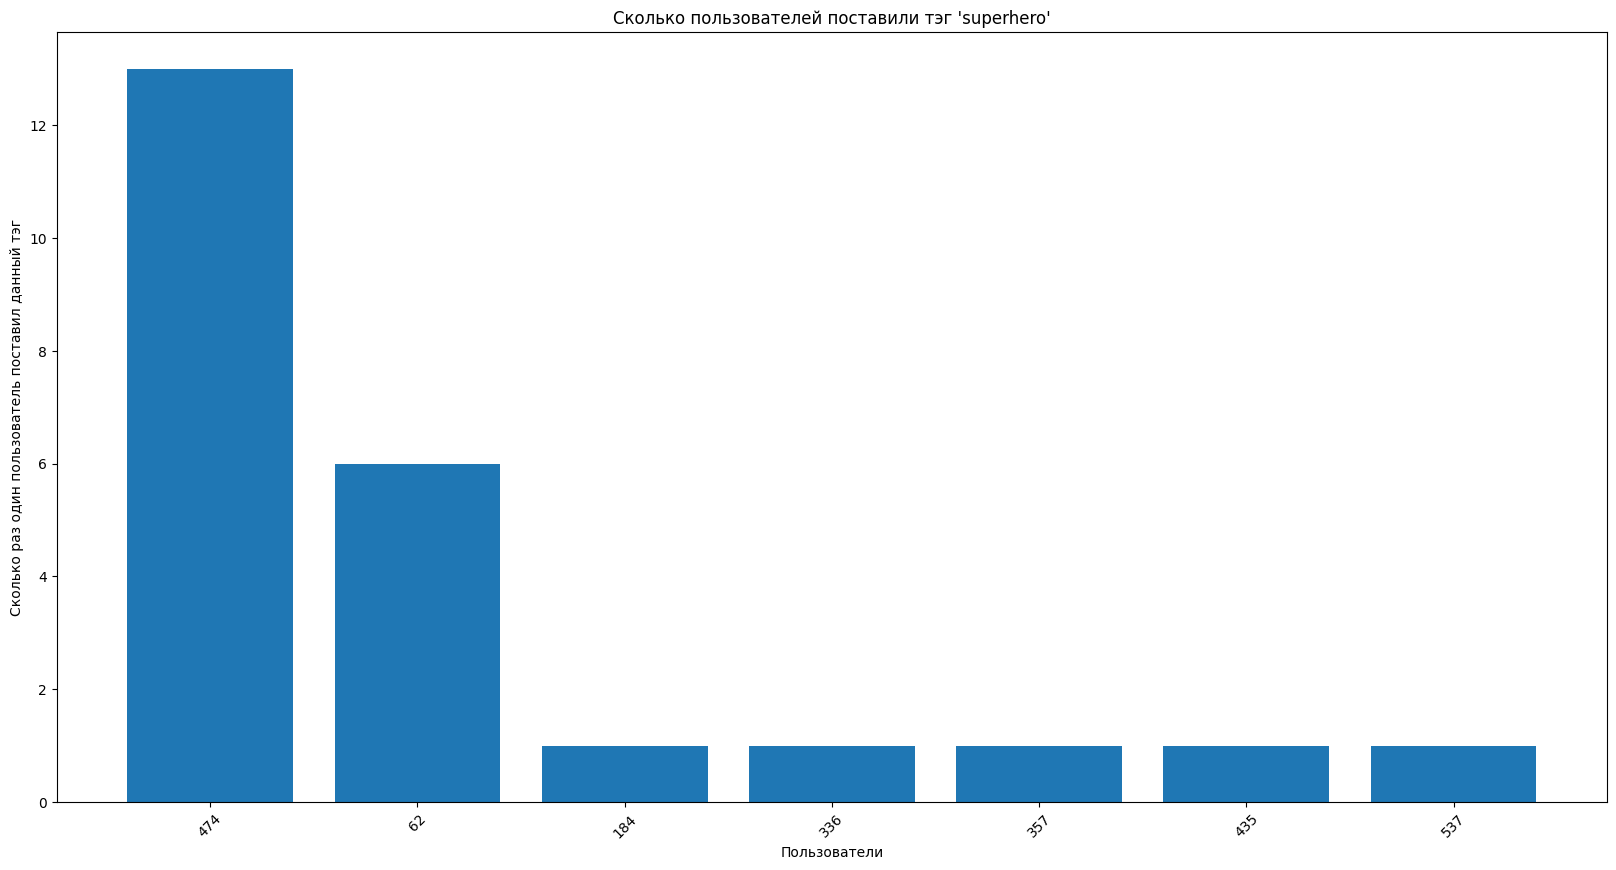

In [10]:
%timeit tags.tag_and_amount_of_users('In Netflix queue')
data = tags.tag_and_amount_of_users('In Netflix queue')
visualize_dict(data, "Пользователи", "Сколько раз один пользователь поставил данный тэг", "Сколько пользователей поставили тэг In Netflix queue'")

%timeit tags.tag_and_amount_of_users('atmospheric')
data = tags.tag_and_amount_of_users('atmospheric')
visualize_dict(data, "Пользователи", "Сколько раз один пользователь поставил данный тэг", "Сколько пользователей поставили тэг 'atmospheric'")

%timeit tags.tag_and_amount_of_users('superhero')
data = tags.tag_and_amount_of_users('superhero')
visualize_dict(data, "Пользователи", "Сколько раз один пользователь поставил данный тэг", "Сколько пользователей поставили тэг 'superhero'")

На графиках видно, что тэги 'atmospheric' и 'superhero' популярны среди нескольких пользователей, в то время как тэг 'In Netflix queue' ставит лишь пользователь с id 474, он же является самым активным пользователем. Следовательно, есть прямая связь между активностью пользователя 474 и популярностью тэга 'In Netflix queue'. 

108 ms ± 520 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


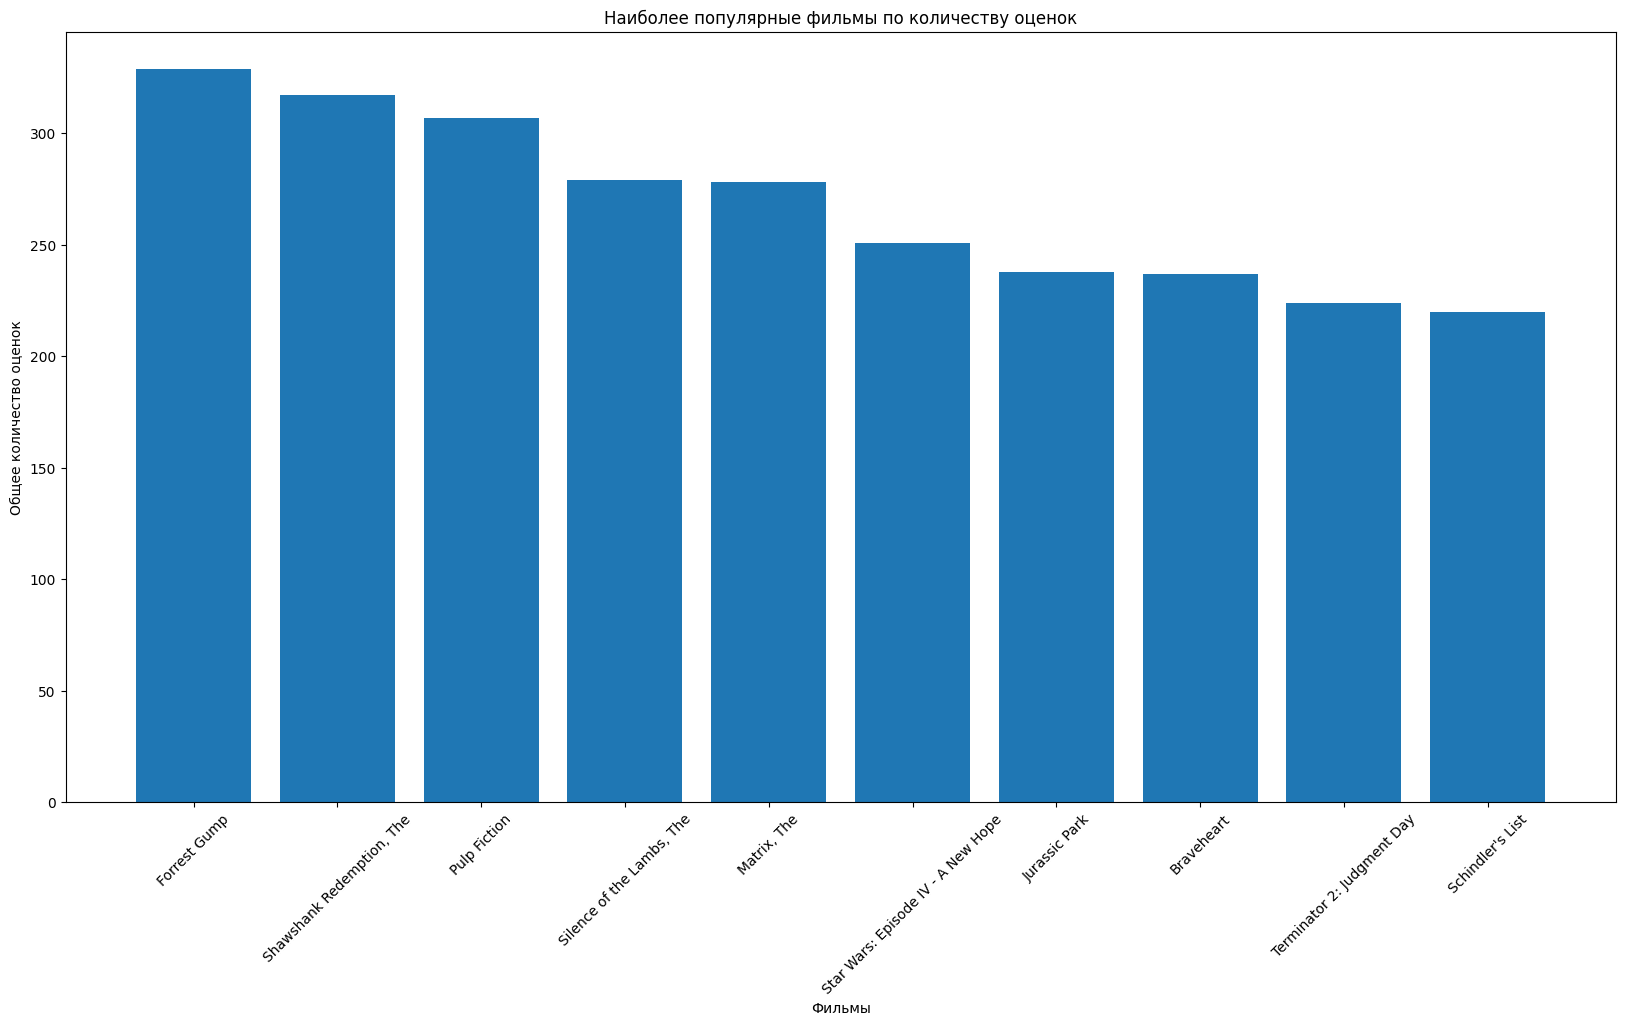

In [11]:
%timeit ratings.movies_by_rating_amount()
data = ratings.movies_by_rating_amount()
visualize_dict(data, "Фильмы", "Общее количество оценок", "Наиболее популярные фильмы по количеству оценок")

113 ms ± 4.74 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


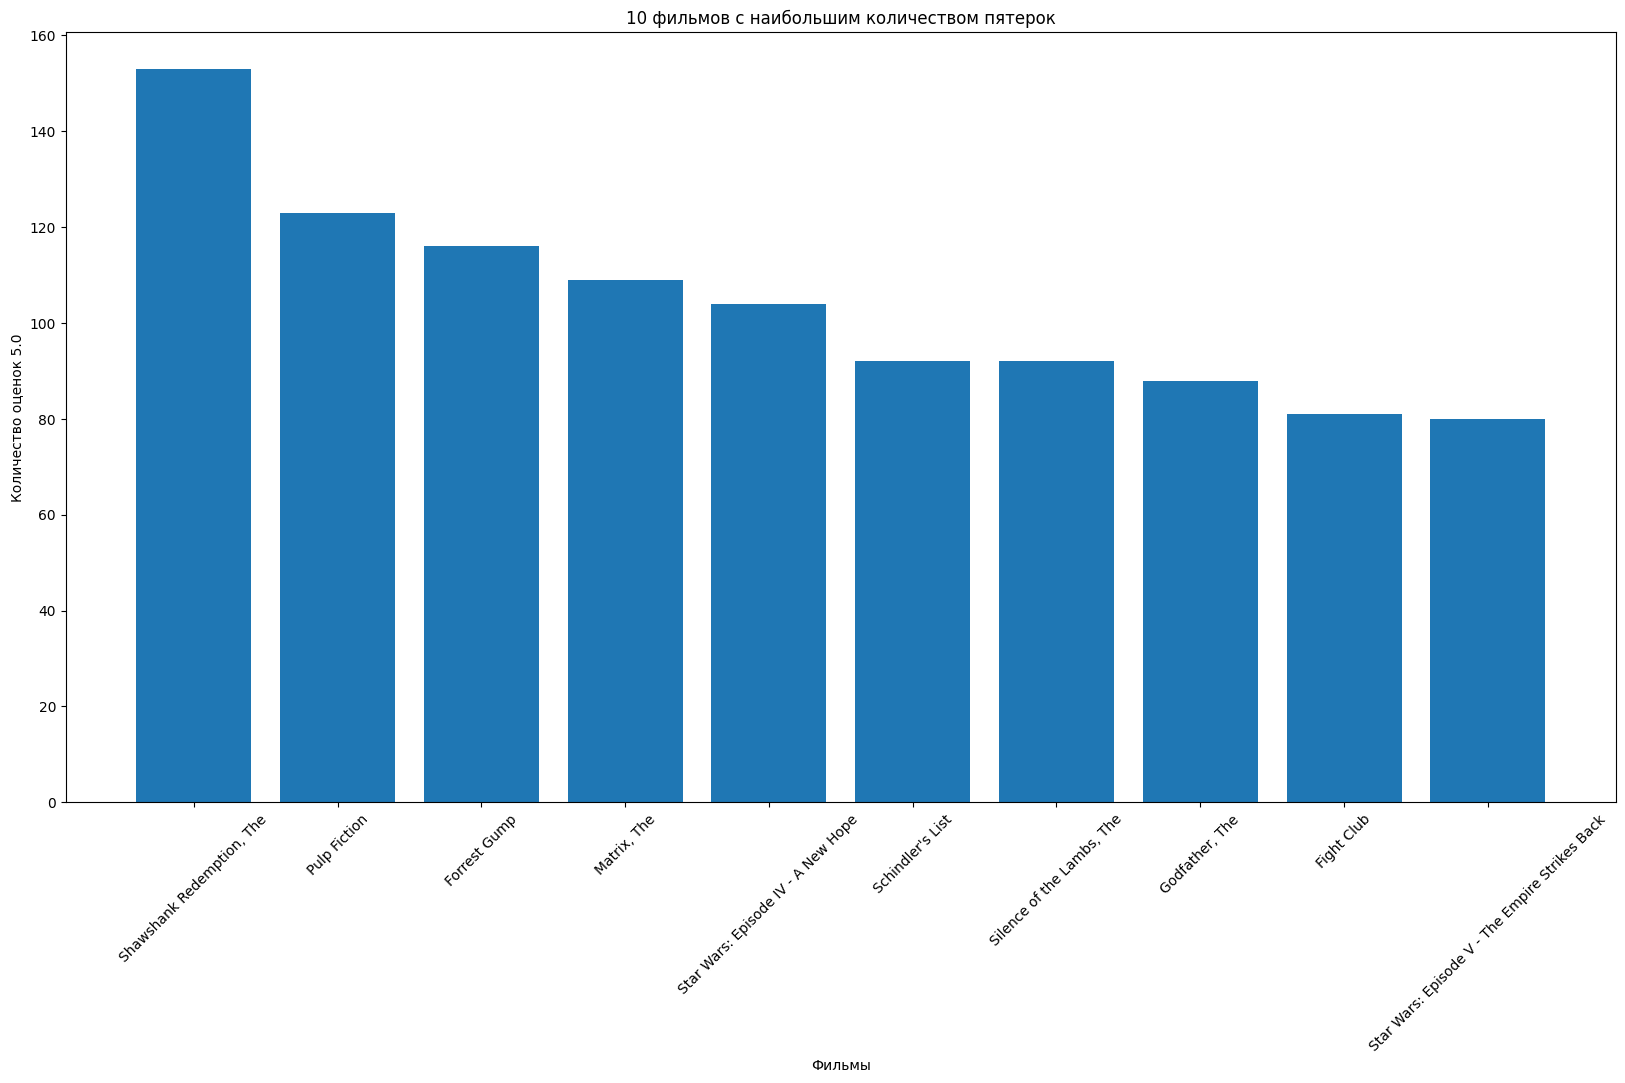

In [12]:
%timeit ratings.top_movies_by_rating()
data = ratings.top_movies_by_rating()
visualize_dict(data, "Фильмы", "Количество оценок 5.0", "10 фильмов с наибольшим количеством пятерок")

Абсолютным фаворитом по количеству максимальных оценок является "Побег из Шоушенка".

138 ms ± 646 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


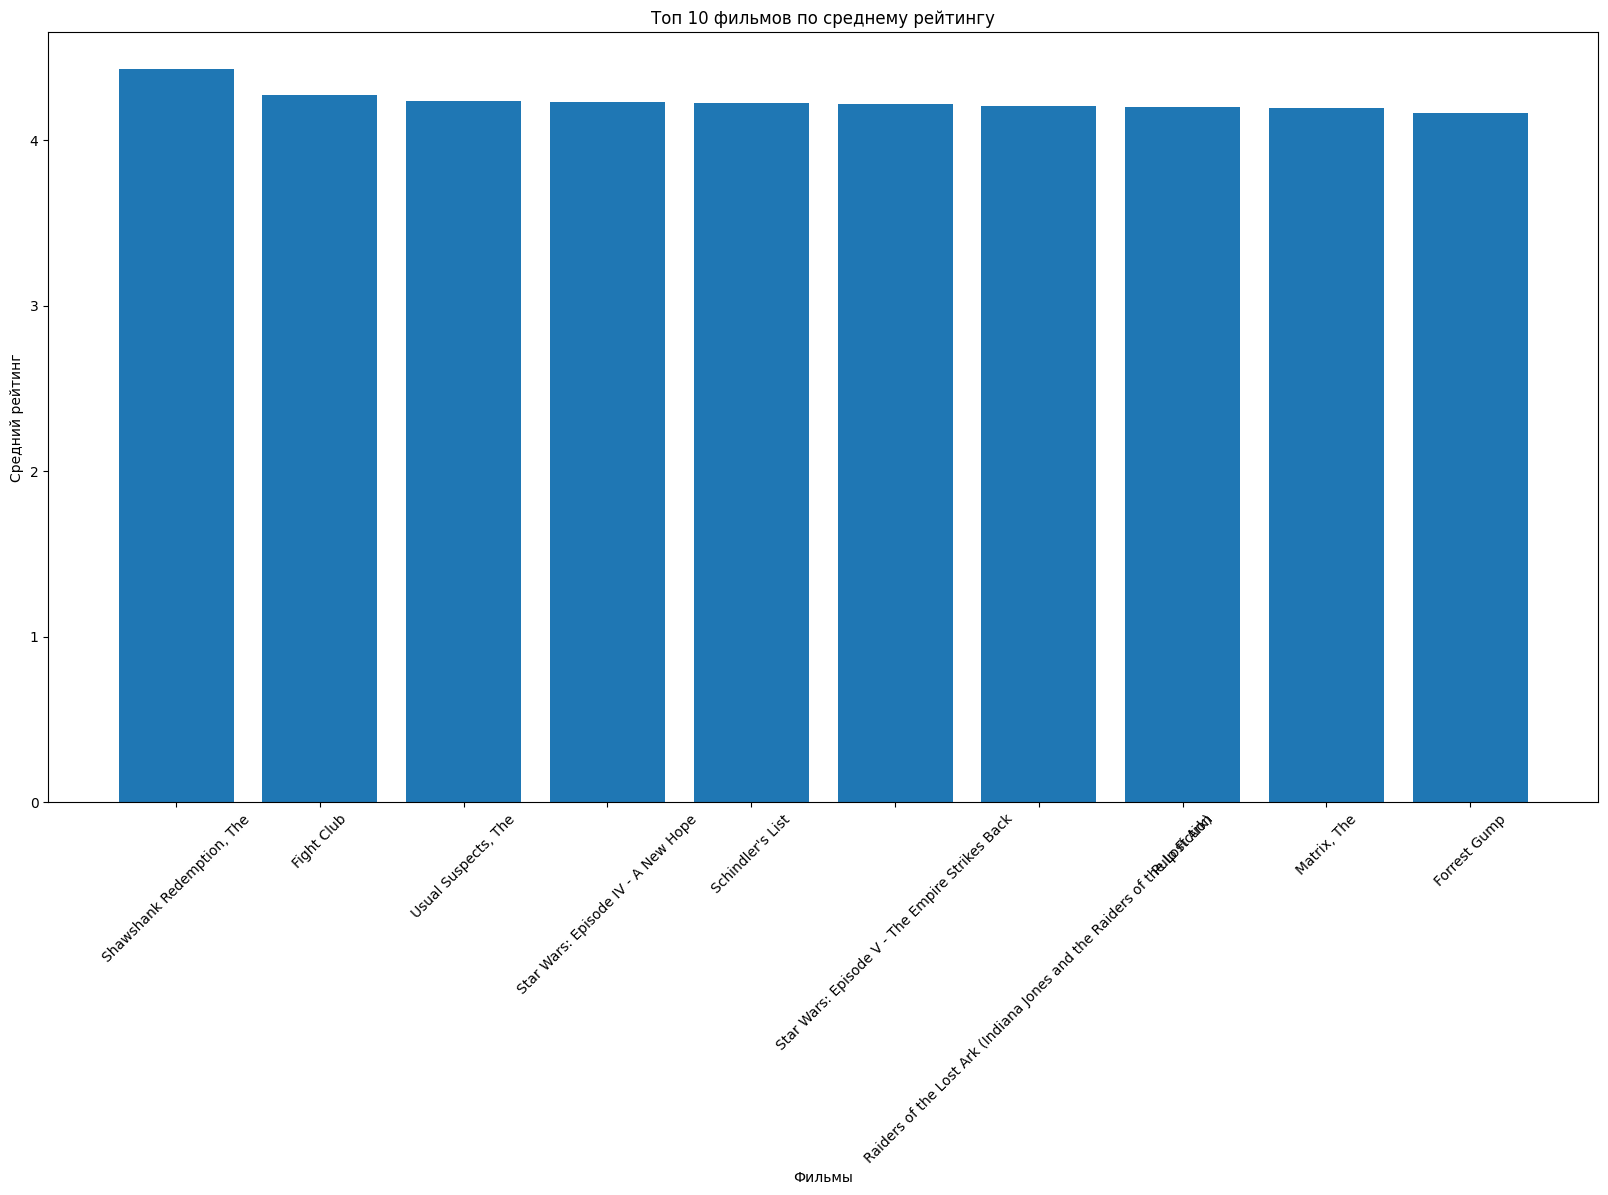

In [13]:
%timeit ratings.top_movies_by_mean_rating()
data = ratings.top_movies_by_mean_rating()
visualize_dict(data, "Фильмы", "Средний рейтинг", "Топ 10 фильмов по среднему рейтингу")

В случае подсчета общего количества оценок первую строчку занял "Форрест Гамп". При посчете количества пятерок или среднего арифметического лидером оказался "Побег из Шоушенка". 

6/10 фильмов совпали для всех трех методов выявления топ-10 популярных фильмов. 

8/10 фильмов совпали для второго и третьего методов, лишь поменяв позиции в рейтинге. При подсчете среднего арифметического учитывались те фильмы, которые оценили более 200 раз. Параметр выбран с целью отсеивания фильмов, которые имеют слишком мало оценок, вследствие чего их средний рейтинг может быть несоразмерно высоким.

5.81 ms ± 65.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


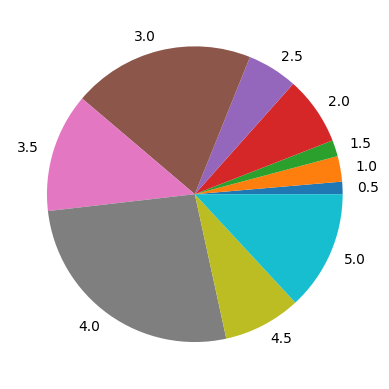

In [5]:
labels = ['0.5', '1.0', '1.5', '2.0', '2.5', '3.0', '3.5', '4.0', '4.5', '5.0']
%timeit ratings.ratings_distribution()
data = ratings.ratings_distribution()
visualize_pie(data, labels)

Пользователи чаще всего оценивают фильмы на 4.0 и 3.0. Негативные оценки в диапазоне 0.5 - 1.5 пользователи ставят крайне редко.  

88.8 ms ± 348 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


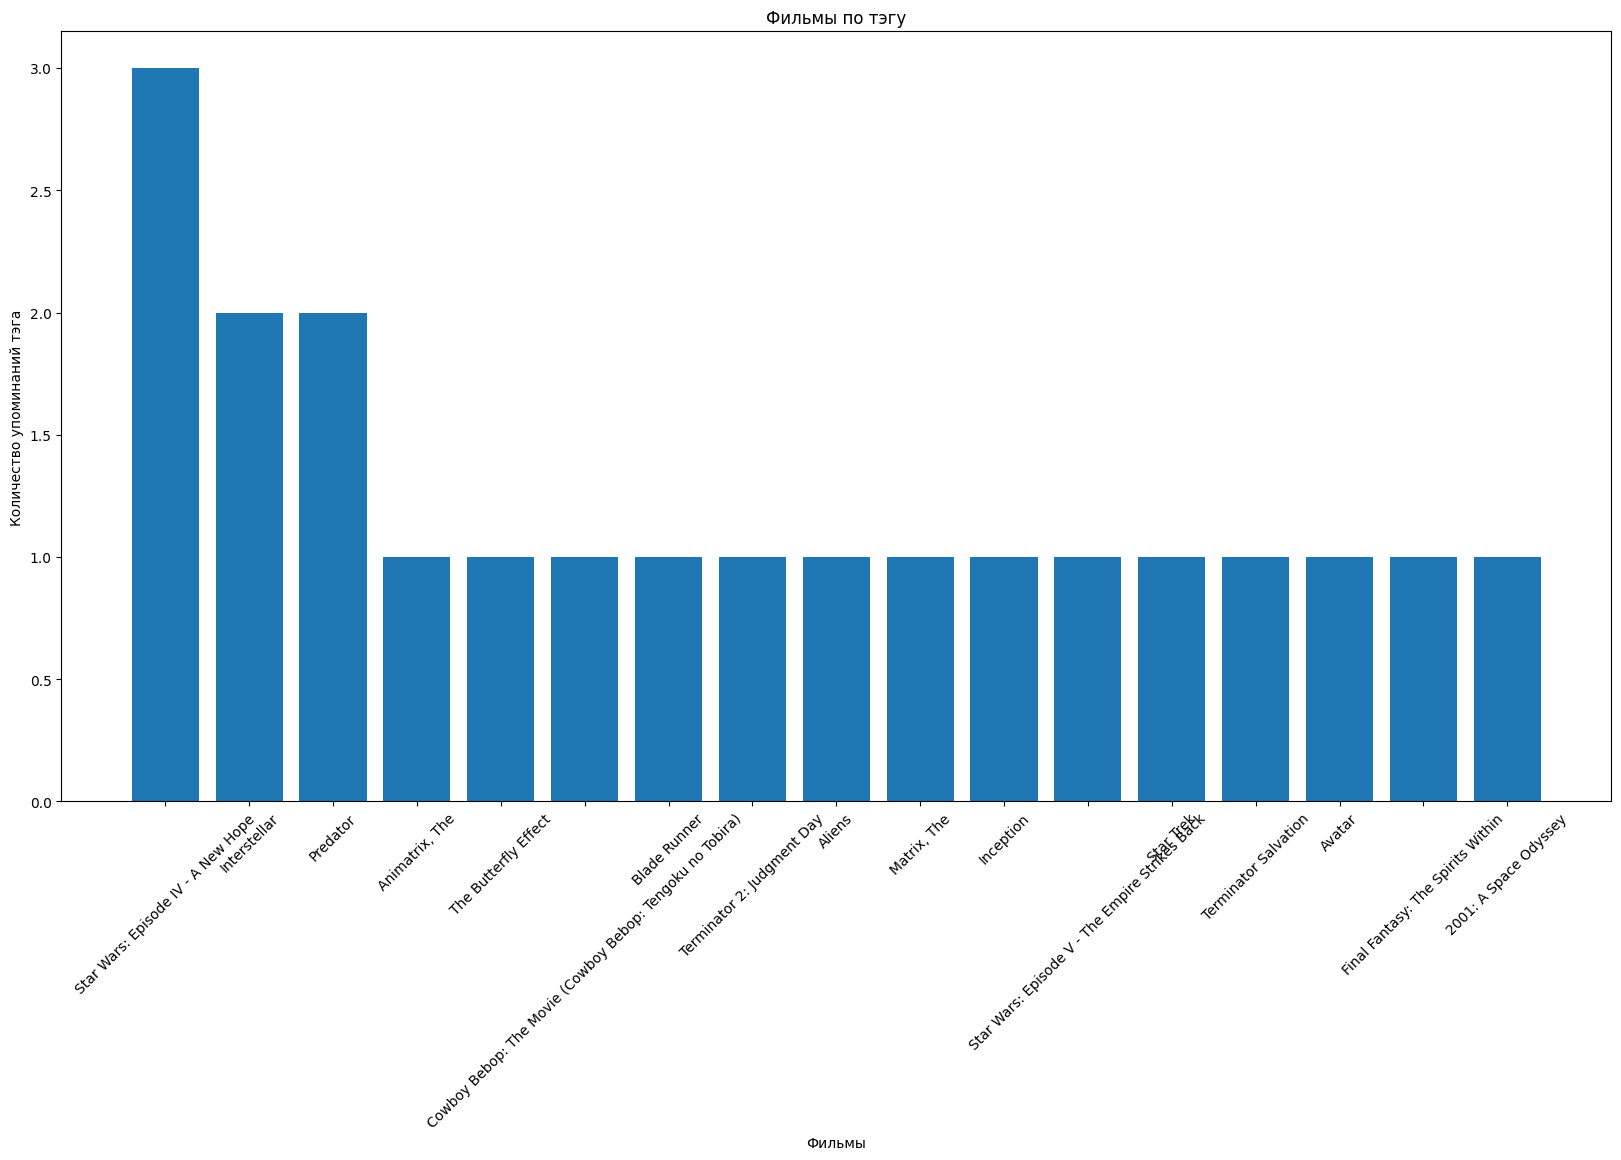

In [6]:
%timeit tags.best_movies_by_tag('sci-fi')
data = tags.best_movies_by_tag('sci-fi')
visualize_dict(data, "Фильмы", "Количество упоминаний тэга", "Фильмы по тэгу")

Метод best_movies_by_tag() позволяет вывести фильмы, охарактеризованные определенным тэгом в порядке количества упоминаний этого тэга. 

Можно посмотреть какие есть фильмы с определенным актером, например, Леонардо Ди Каприо.  

88.7 ms ± 442 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


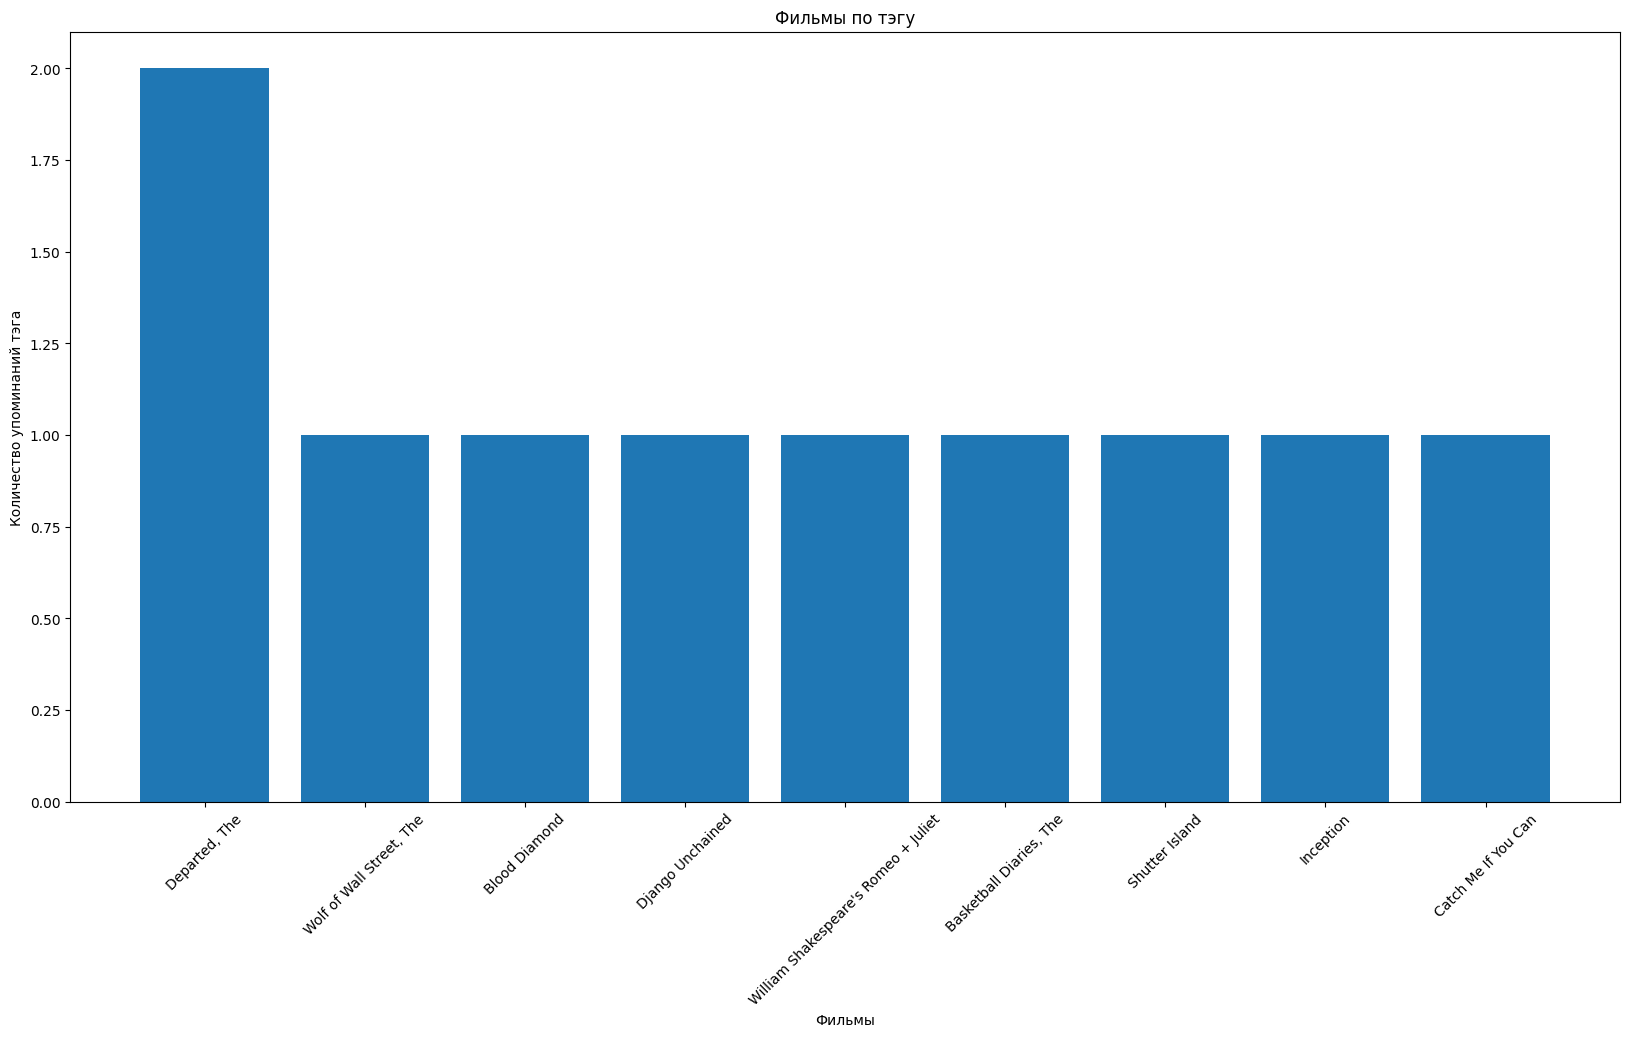

In [7]:
%timeit tags.best_movies_by_tag('Leonardo DiCaprio')
data = tags.best_movies_by_tag('Leonardo DiCaprio')
visualize_dict(data, "Фильмы", "Количество упоминаний тэга", "Фильмы по тэгу")

98.3 ms ± 4.12 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


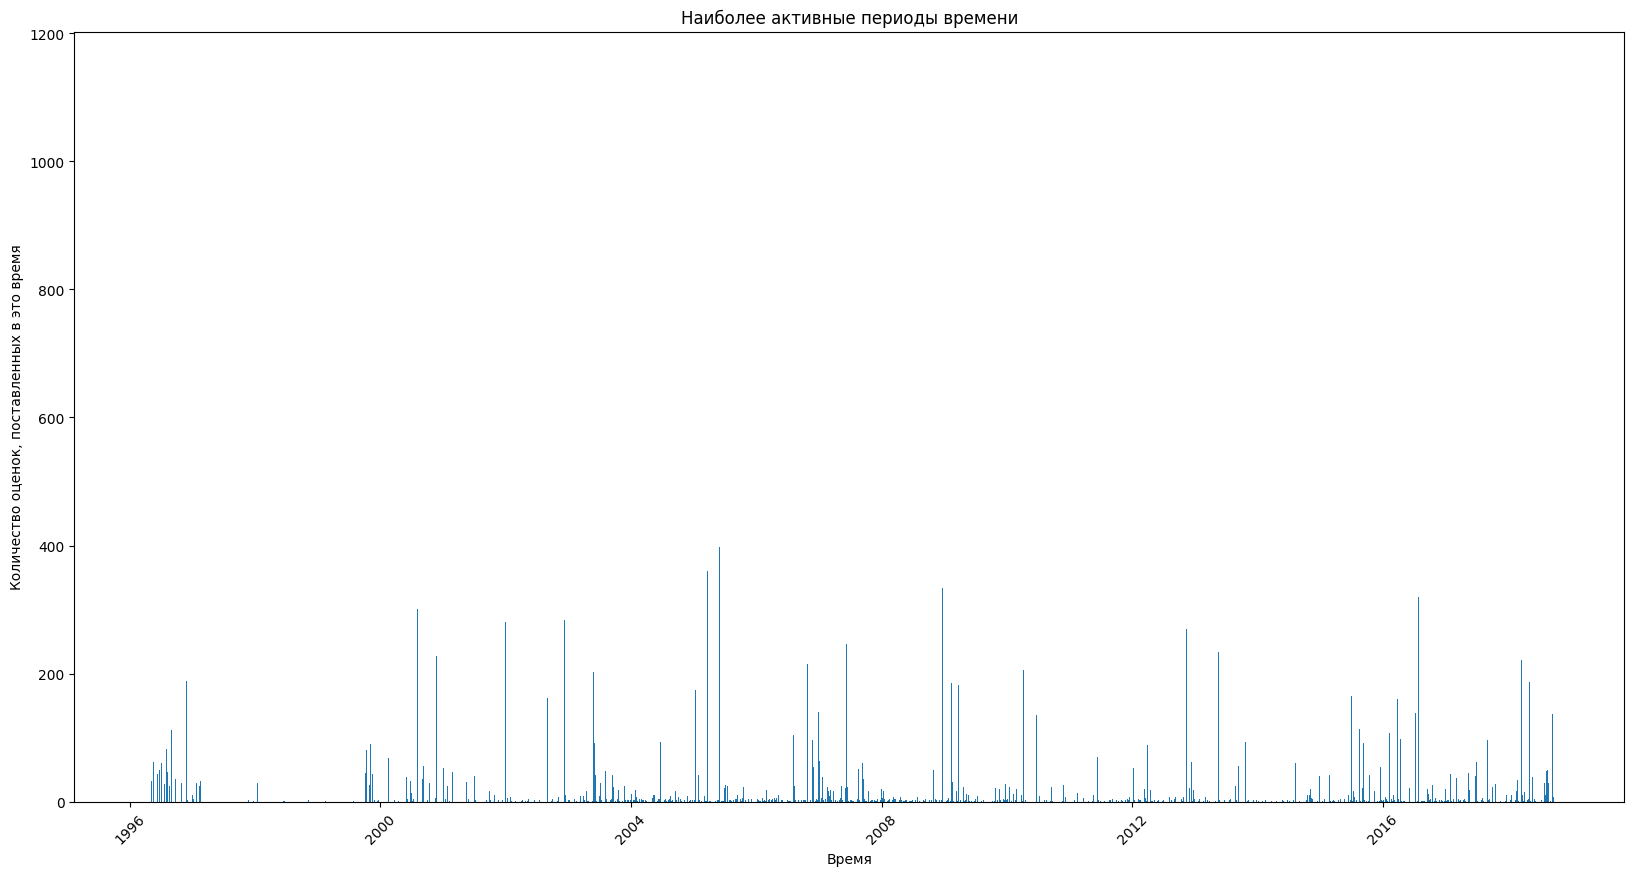

In [8]:
%timeit ratings.most_active_time_period()
data = ratings.most_active_time_period()
visualize_dict(data, "Время", "Количество оценок, поставленных в это время", "Наиболее активные периоды времени")

В датасете представлены оценки, поставленные пользователями в период с 1996 по примерно 2019 год. Больше всего оценок было поставлено примерно в 2005 году. Наблюдаются отдельные всплески активности на протяжении всего времени. 

3.46 ms ± 25.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


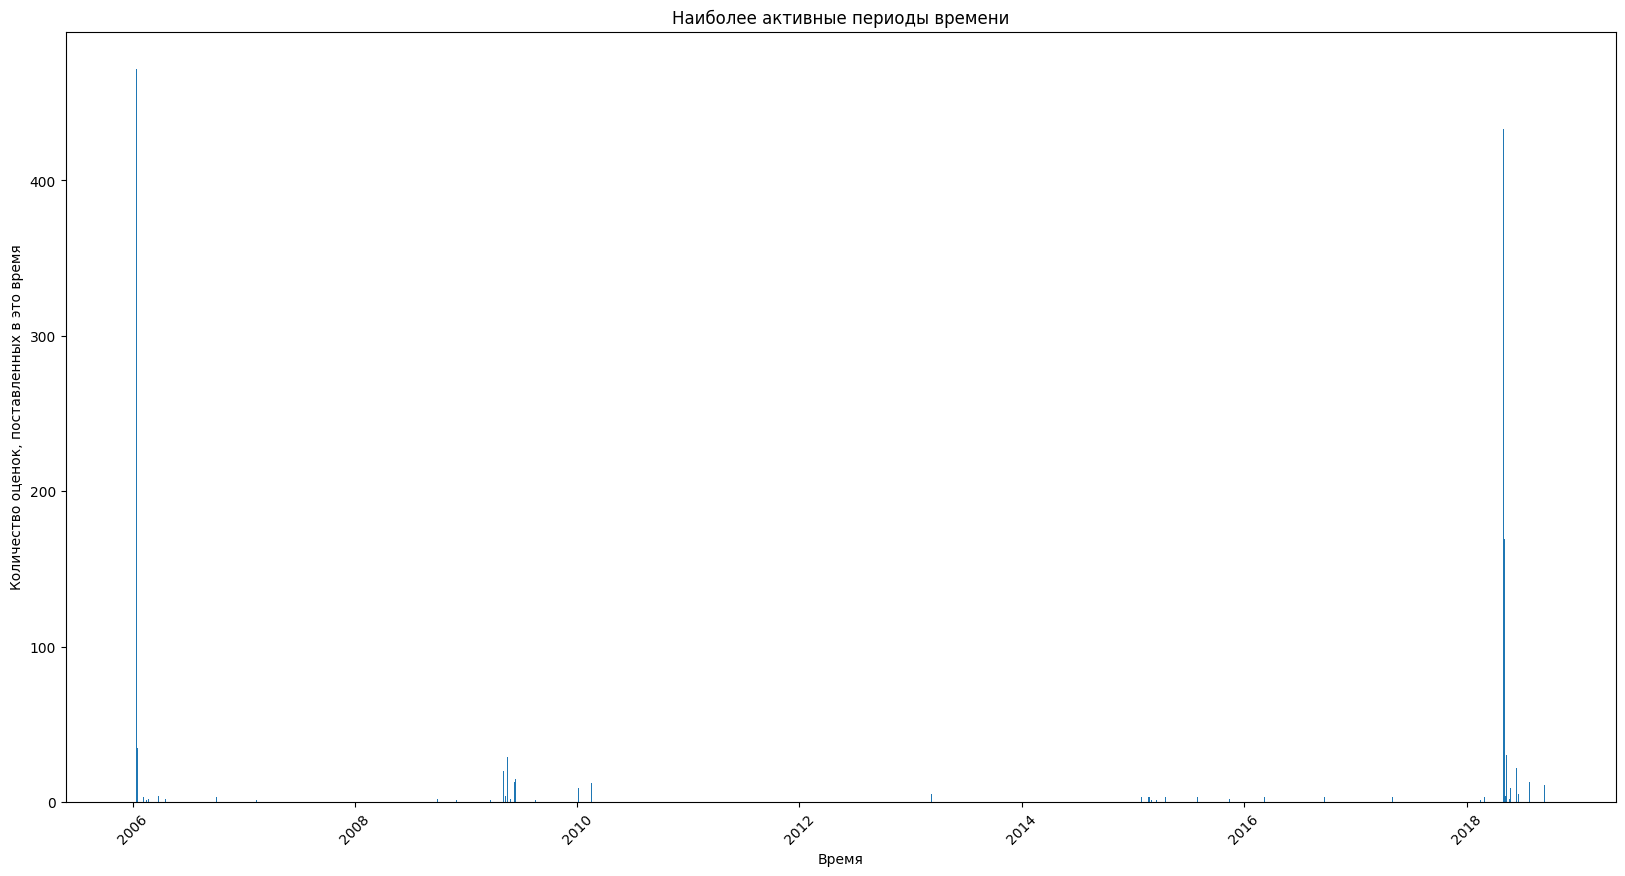

In [2]:
%timeit tags.most_active_time_period()
data = tags.most_active_time_period()
visualize_dict(data, "Время", "Количество оценок, поставленных в это время", "Наиболее активные периоды времени")

В отличие от распределения оценок по временной шкале, распределение времени выставления тэгов крайне неравномерное. Наблюдаются яркие всплески в 2006 и в 2018 году.